<a href="https://colab.research.google.com/github/rescianrey/sml_project_2/blob/main/domain_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Generation Detection


## Data Loading

In [ ]:
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.base import clone
import numpy as np

def load_json_data(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    return [json.loads(line) for line in lines]

# Load datasets
df_domain1 = pd.DataFrame(load_json_data('domain1_train_data.json'))
df_domain2 = pd.DataFrame(load_json_data('domain2_train_data.json'))
df_test = pd.DataFrame(load_json_data('test_data.json'))


In [ ]:
print(df_domain1)

                                                  text  label   id
0    [6, 22, 34, 76, 501, 977, 1, 2514, 13623, 76, ...      0    0
1    [222, 31, 4108, 104, 132, 361, 39, 2305, 12, 9...      0    1
2    [736, 7194, 113, 12, 366, 2870, 123, 101, 12, ...      0    2
3    [48, 1, 2025, 69, 361, 533, 327, 237, 4150, 13...      0    3
4    [2973, 66, 1, 1493, 260, 2740, 50, 1027, 50, 1...      0    4
..                                                 ...    ...  ...
995  [125, 802, 4, 2403, 74, 6488, 13, 11054, 306, ...      1  995
996  [4365, 117, 331, 5148, 36, 64, 1685, 1717, 6, ...      1  996
997  [4, 831, 1025, 497, 22, 36, 440, 66, 12, 2359,...      1  997
998  [3504, 324, 151, 3113, 39, 1483, 13, 422, 8260...      1  998
999  [6993, 3567, 101, 12, 996, 69, 3567, 3107, 13,...      1  999

[1000 rows x 3 columns]


## Domain 1 Distribution

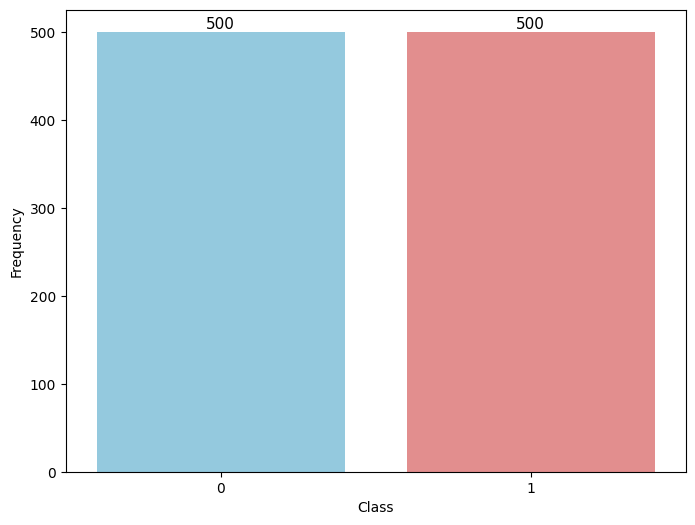

In [ ]:
# Plot freq vs class for domain 1

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df_domain1, palette=['skyblue', 'lightcoral'], legend=False, hue='label')
# plt.title('Class Frequency Distribution for Domain 1')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

plt.show()


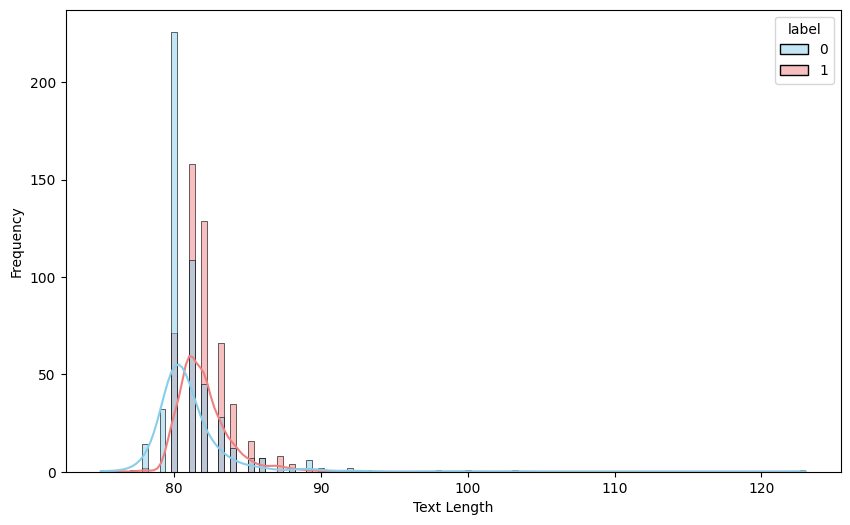

In [ ]:
# Plot the freq vs text length for each entries in domain 1

# Add a column for text length
df_domain1['text_length'] = df_domain1['text'].apply(len)
# Plot freq vs text length for each class
plt.figure(figsize=(10, 6))
sns.histplot(data=df_domain1, x='text_length', hue='label', kde=True, palette=['skyblue', 'lightcoral'])
# plt.title('Frequency Distribution of Text Length for Each Class in Domain 1')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

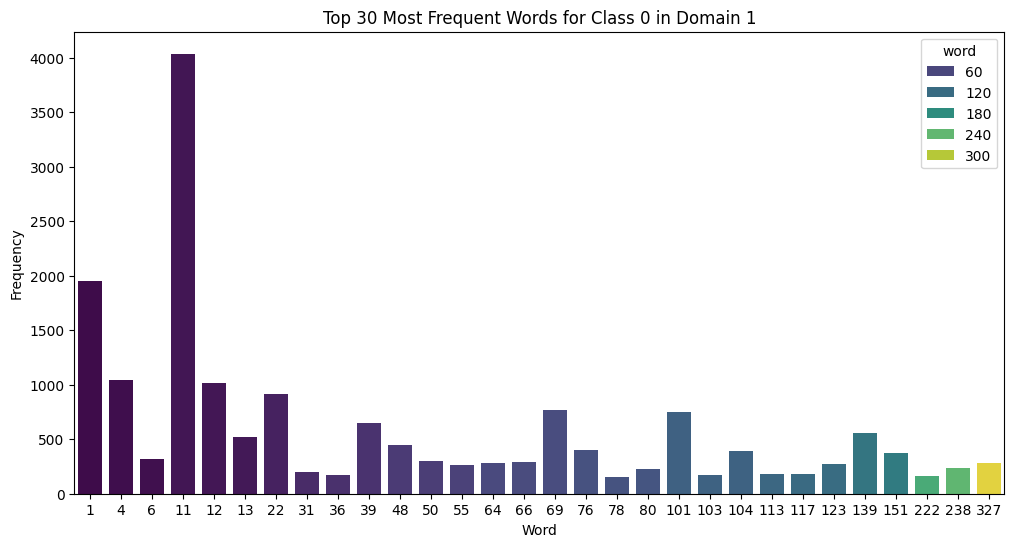

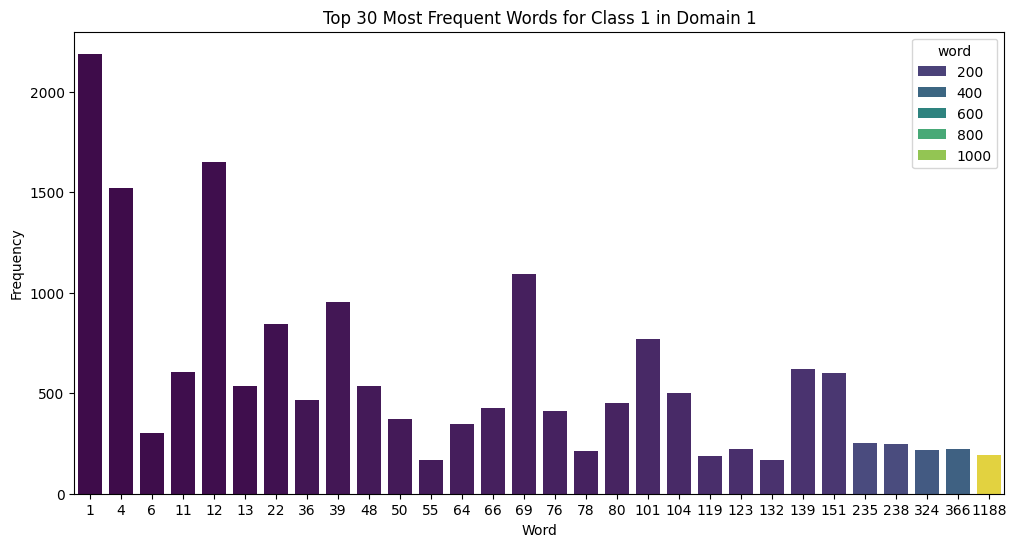

In [ ]:
# 2 plots of the freq of words/tokens used class 1 and class 0

from collections import Counter

def get_word_counts(text_series):
    all_texts = []
    for k, v in text_series.items():
        all_texts += v
    return Counter(all_texts)

# Separate data by label
df_class_0 = df_domain1[df_domain1['label'] == 0]
df_class_1 = df_domain1[df_domain1['label'] == 1]

# Get word counts for each class
word_counts_0 = get_word_counts(df_class_0['text'])
word_counts_1 = get_word_counts(df_class_1['text'])

# Get top N words for plotting (e.g., top 20)
top_n = 30
top_words_0 = word_counts_0.most_common(top_n)
top_words_1 = word_counts_1.most_common(top_n)

# Create dataframes for plotting
df_top_words_0 = pd.DataFrame(top_words_0, columns=['word', 'frequency'])
df_top_words_1 = pd.DataFrame(top_words_1, columns=['word', 'frequency'])

# Plot for Class 0
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', hue='word', data=df_top_words_0, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words for Class 0 in Domain 1')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Plot for Class 1
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', hue='word', data=df_top_words_1, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words for Class 1 in Domain 1')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

## Domain 2 Class Distribution

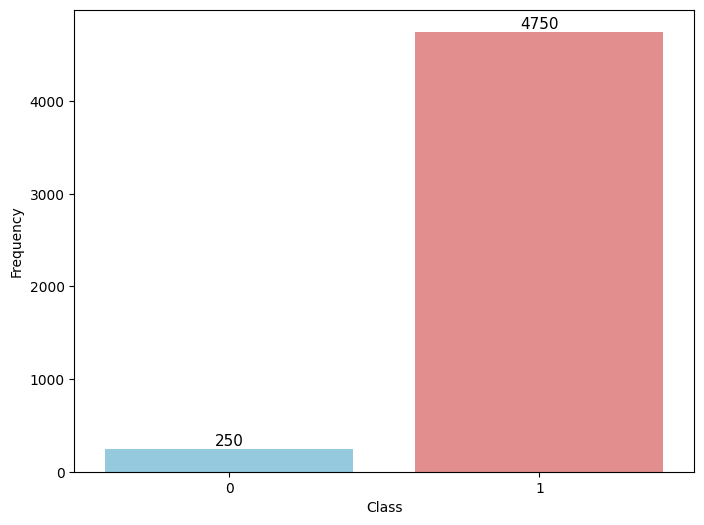

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df_domain2, palette=['skyblue', 'lightcoral'], legend=False, hue='label')
# plt.title('Class Frequency Distribution for Domain 2')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11)

plt.show()

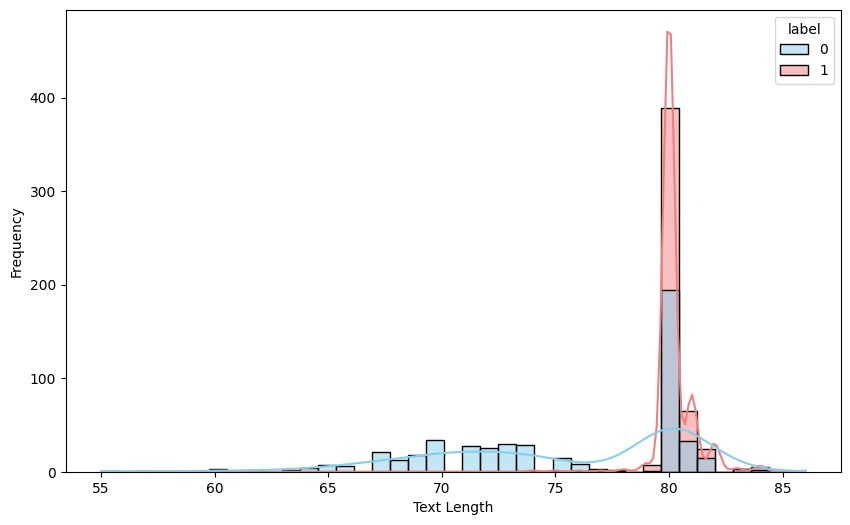

In [ ]:
# Plot the freq vs text length for each entries in domain 2

# Add a column for text length
df_domain1['text_length'] = df_domain2['text'].apply(len)
# Plot freq vs text length for each class
plt.figure(figsize=(10, 6))
sns.histplot(data=df_domain1, x='text_length', hue='label', kde=True, palette=['skyblue', 'lightcoral'])
# plt.title('Frequency Distribution of Text Length for Each Class in Domain 2')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

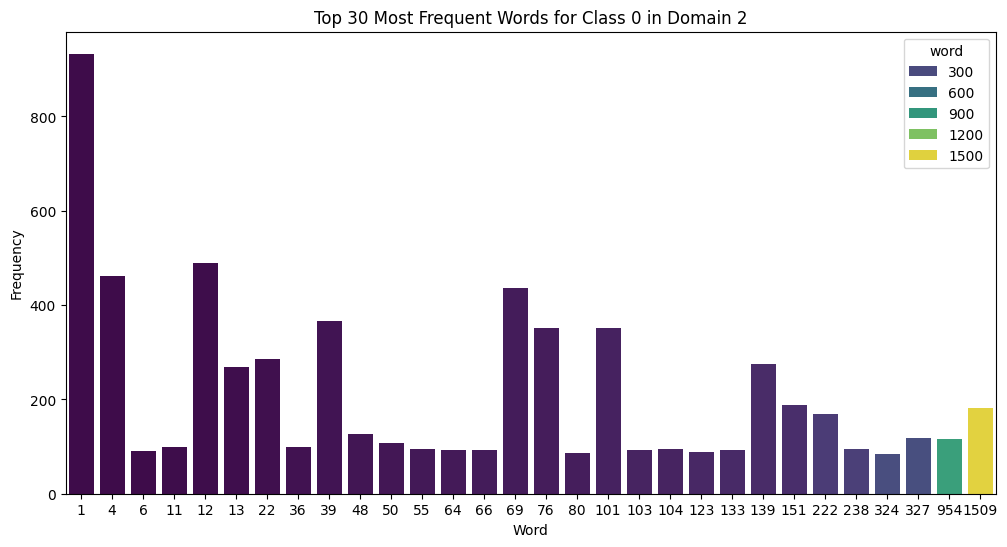

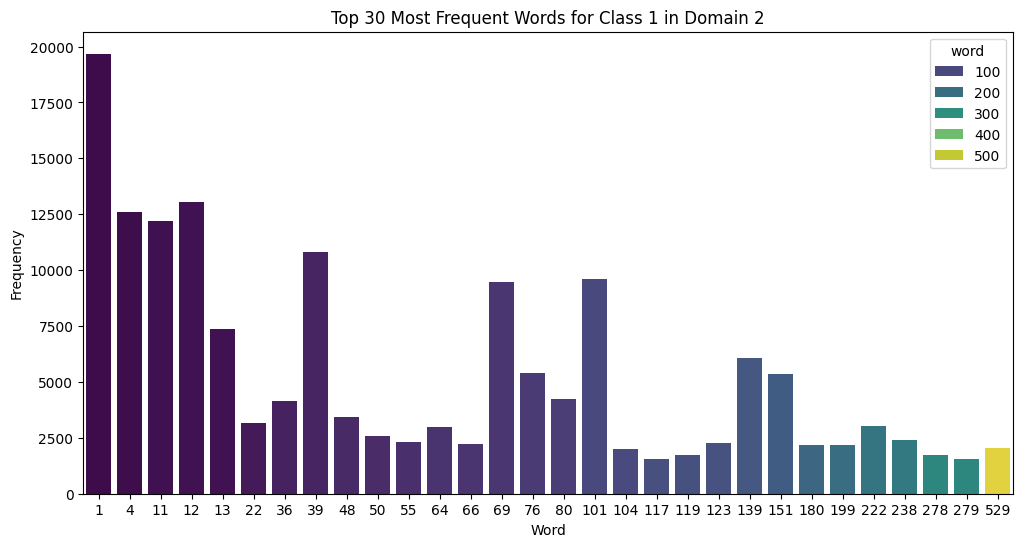

In [ ]:
# 2 plots of the freq of words/tokens used class 1 and class 0

# Separate data by label
df_class_0_dom2 = df_domain2[df_domain2['label'] == 0]
df_class_1_dom2 = df_domain2[df_domain2['label'] == 1]

# Get word counts for each class
word_counts_0 = get_word_counts(df_class_0_dom2['text'])
word_counts_1 = get_word_counts(df_class_1_dom2['text'])

# Get top N words for plotting (e.g., top 20)
top_n = 30
top_words_0 = word_counts_0.most_common(top_n)
top_words_1 = word_counts_1.most_common(top_n)

# Create dataframes for plotting
df_top_words_0 = pd.DataFrame(top_words_0, columns=['word', 'frequency'])
df_top_words_1 = pd.DataFrame(top_words_1, columns=['word', 'frequency'])

# Plot for Class 0
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', hue='word', data=df_top_words_0, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words for Class 0 in Domain 2')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

# Plot for Class 1
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', hue='word', data=df_top_words_1, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words for Class 1 in Domain 2')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

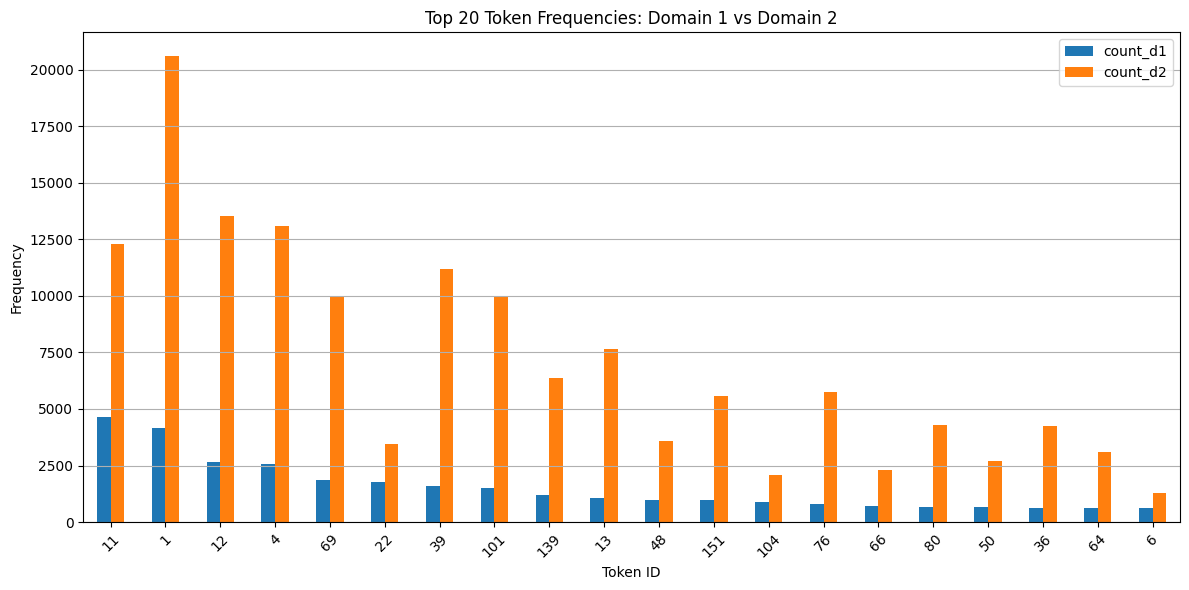

In [ ]:
def get_token_counts(df, top_n=50):
    counts = Counter([token for text in df['text'] for token in text])
    return pd.DataFrame(counts.most_common(top_n), columns=["token", "count"])

df1_counts = get_token_counts(df_domain1, top_n=50).set_index("token")
df2_counts = get_token_counts(df_domain2, top_n=50).set_index("token")

# Join and fill missing tokens
combined = df1_counts.join(df2_counts, lsuffix='_d1', rsuffix='_d2', how='outer').fillna(0)
combined = combined.sort_values(by='count_d1', ascending=False).head(20)

# Plot side-by-side
combined.plot(kind='bar', figsize=(12, 6))
plt.title("Top 20 Token Frequencies: Domain 1 vs Domain 2")
plt.ylabel("Frequency")
plt.xlabel("Token ID")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

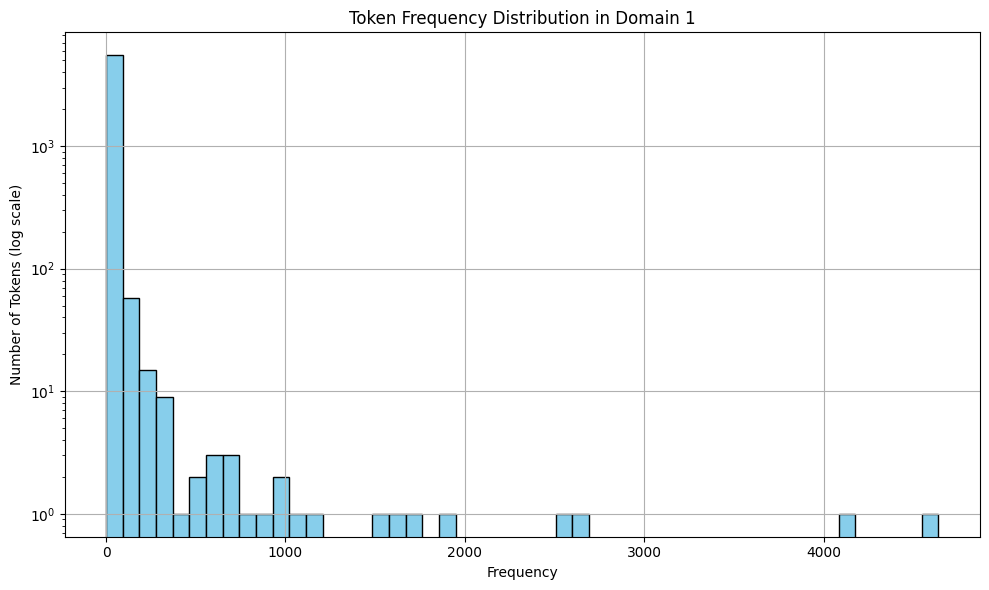

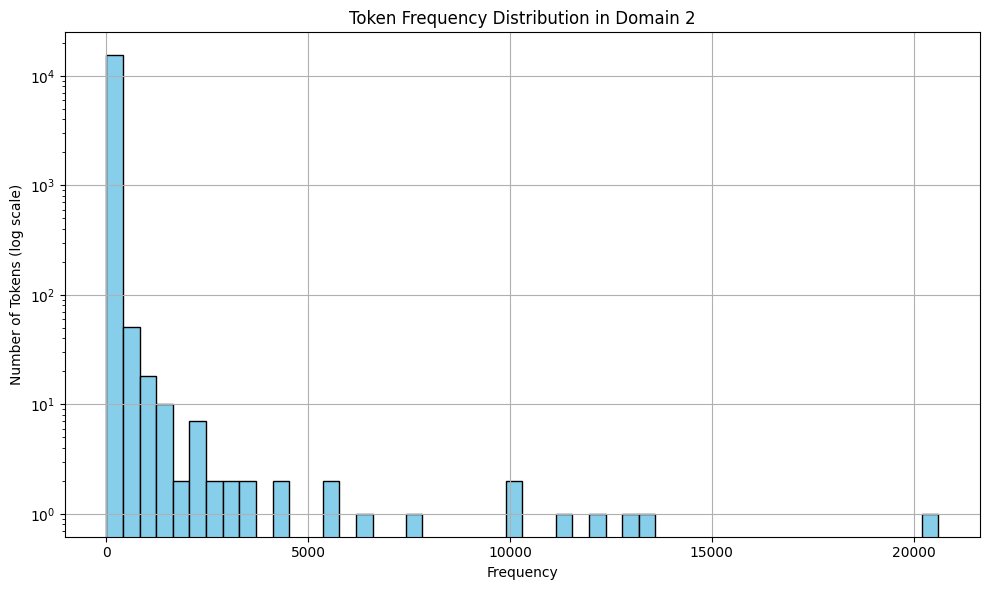

In [ ]:
def plot_token_frequency_distribution(df, domain_name):
    counts = Counter([token for text in df['text'] for token in text])
    freqs = list(counts.values())

    plt.figure(figsize=(10, 6))
    plt.hist(freqs, bins=50, color='skyblue', edgecolor='black', log=True)
    plt.title(f"Token Frequency Distribution in {domain_name}")
    plt.xlabel("Frequency")
    plt.ylabel("Number of Tokens (log scale)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_token_frequency_distribution(df_domain1, "Domain 1")
plot_token_frequency_distribution(df_domain2, "Domain 2")
